All the libaries we used 

In [7]:
!pip install testfixtures
!pip install nltk
!pip install turicreate
!pip install twython
!pip install scikit-surprise


     |████████████████████████████████| 92kB 3.3MB/s 
     |████████████████████████████████| 91.8MB 46kB/s 
     |████████████████████████████████| 3.4MB 55.0MB/s 
     |████████████████████████████████| 86.3MB 50kB/s 
     |████████████████████████████████| 327kB 45.8MB/s 
     |████████████████████████████████| 3.8MB 31.9MB/s 
     |████████████████████████████████| 450kB 47.5MB/s 
  Created wheel for resampy: filename=resampy-0.2.1-cp36-none-any.whl size=320850 sha256=6a9df4f6f9f745a816ba5cb1c4863e5fd219b14b0821596e2ec5255b05eddd18
  Stored in directory: /root/.cache/pip/wheels/ff/4f/ed/2e6c676c23efe5394bb40ade50662e90eb46e29b48324c5f9b
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=6f3bcaff3a1c40f7282e586fae2c4b425325dc4af2231d73e7255c56da0196db
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built resampy gast
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.

In [8]:
import pandas as pd
import numpy as np
import scipy
from sklearn.metrics import mean_squared_error
import time
from math import sqrt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import accuracy_score, f1_score
import gensim.downloader as api
import gensim
from gensim import corpora, models
from pprint import pprint
from gensim.utils import simple_preprocess
import re
from gensim.models import Doc2Vec
from gensim.models.doc2vec import TaggedDocument
from tqdm import tqdm
import multiprocessing
from sklearn import utils
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from gensim.test.test_doc2vec import ConcatenatedDoc2Vec
from smart_open import smart_open
import nltk    
# return the wordnet object value corresponding to the POS tag
from nltk.corpus import wordnet
import string
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import turicreate as tc
import turicreate.aggregate as agg
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import pickle
nltk.download('words')
nltk.download('punkt')
nltk.download('vader_lexicon')

 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [0]:
assert gensim.models.doc2vec.FAST_VERSION > -1




**Step 1**

Clean and map the train data fields  ( user_id , business id t) to numeric id
In the end we have generate two files

1)	X.to_csv('ID4Train.csv') 
which contain User_id, business_id, Stars 

2)	df.to_csv('ID4TrainFull.csv') which contain the original table with the change that : user_id , business_id 
replaced by numeric id per the mapping 
3) We saved the user dictionary , Business dictionary to files  


In [10]:
df=pd.read_csv('trainData.csv')
#df= tc.SFrame.read_csv('gdrive/My Drive/trainData.csv')
df = df.dropna()
df['user_id'] = df['user_id'].astype(str)
df['business_id'] = df['business_id'].astype(str)
df = df.dropna()
df['stars']= df['stars'].astype(np.int32)
users = df['user_id'].unique() #list of all users
business = df['business_id'].unique() #list of all busness
rat_avg =  df['stars'].mean()
print("Number of users", len(users))
print("Number of business", len(business))
print("average rating ", df['stars'].mean())
n_business = df['business_id'].nunique()
n_users = df['user_id'].nunique()
n_business = df['business_id'].nunique()
print("n_business, n_users", n_business,n_users)
u_ids = df['user_id'].unique().tolist()
i_ids = df['business_id'].unique().tolist()
user_dict = dict(zip(u_ids, [i for i in range(len(u_ids))]))
bus_dict = dict(zip(i_ids, [i for i in range(len(i_ids))]))
df['user_id'] = df['user_id'].map(user_dict)
df['business_id'] = df['business_id'].map(bus_dict)
df['user_id'] = df['user_id'].astype(np.int32)
df['business_id']= df['business_id'].astype(np.int32)
X = df[['user_id', 'business_id', 'stars']]
X.columns.name = 'user_id','business_id','stars'
pickle_user = open("userdict.pickle","wb")
pickle.dump(user_dict, pickle_user)
pickle_user.close()
pickle_bus = open("busdict.pickle","wb")
pickle.dump(bus_dict, pickle_bus)
pickle_bus.close()
X.to_csv('ID4Train.csv')
df.to_csv('ID4TrainFull.csv')
print ("Finish Clean and replacing names with ID save to file ")


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Number of users 1176855
Number of business 174282
average rating  3.7276927894056398
n_business, n_users 174282 1176855
Finish Clean and replacing names with ID save to file 


In [11]:
# Preprocess for the test data - mainly removing NA and maping the users, business to id per the mapping we built form the train data
#In case user , bsuiness dont exist we put -1
df=pd.read_csv('testData.csv')
#df= tc.SFrame.read_csv('gdrive/My Drive/trainData.csv')
df = df.dropna()
df['user_id'] = df['user_id'].astype(str)
df['business_id'] = df['business_id'].astype(str)
df = df.dropna()
df['stars']= df['stars'].astype(np.int32)
users = df['user_id'].unique() #list of all users
business = df['business_id'].unique() #list of all busness
rat_avg_t =  df['stars'].mean()
print("Number of users", len(users))
print("Number of business", len(business))
print("average rating test", df['stars'].mean())
n_business = df['business_id'].nunique()
n_users = df['user_id'].nunique()
n_business = df['business_id'].nunique()
print("n_business, n_users", n_business,n_users)
pickle_in = open("userdict.pickle","rb")
user_dict = pickle.load(pickle_in)
pickle_in = open("busdict.pickle","rb")
bus_dict = pickle.load(pickle_in)
df['user_id'] = df['user_id'].map(user_dict)
df['business_id'] = df['business_id'].map(bus_dict)
df.fillna(-1, inplace=True)
df['user_id'] = df['user_id'].astype(np.int32)
df['business_id']= df['business_id'].astype(np.int32)

X = df[['user_id', 'business_id', 'stars']]
X.columns.name = 'user_id','business_id','stars'
X.to_csv('ID2test.csv')
df.to_csv('ID2testFull.csv')
print ("Finish Clean and replacing names with ID save to file ")

Number of users 504159
Number of business 138544
average rating test 3.727925734605173
n_business, n_users 138544 504159
Finish Clean and replacing names with ID save to file 


### **Block 1 - This part must run before running SVD train or SVDpp train function**

In [12]:
# After we prepare tehe data frame  clean it and map user to user id - we will read it , split to train , val with a smart model of turicreare 
#We will also for the SVD++ built list of rated business id per user 

#sf= tc.SFrame.read_csv('gdrive/My Drive/ID4Train.csv',verbose = False)

sf= tc.SFrame.read_csv('ID4Train.csv',verbose = False)

training_data, validation_data = tc.recommender.util.random_split_by_user(sf, 'user_id', 'business_id')
X, X_val = tc.recommender.util.random_split_by_user(sf, 'user_id', 'business_id',item_test_proportion = 0.9)

g = sf.groupby('user_id', {'user': agg.COUNT()})

users =int( g.num_rows())
g = sf.groupby('business_id', {'bus': agg.COUNT()})
business = int(g.num_rows())
print ("******************** " ,users,business)
rat_avg = X['stars'].mean()
rat_std = X['stars'].std()
user_rating_stats = sf.groupby("user_id",{"bud_u_id":agg.CONCAT("business_id")}) #built list of rated business id per user 
print (X.shape,X_val.shape)

### reading th test data 
sft= tc.SFrame.read_csv('ID2test.csv',verbose = False)
print ("Finshed reading files for SVD")

********************  1176855 174282
(4206004, 4) (3330, 4)
Finshed reading files for SVD


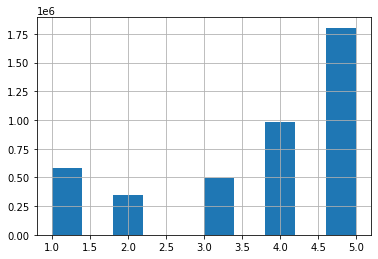

In [13]:
 g= sf.to_dataframe()
 g['stars'].hist()


In [0]:
def TrainBaseModel (X,X_val ,Latentfeatures ,max_epoc,reg,lr):

      # Initalize the pu,qi,bu,bi
      pu = np.random.normal(0, .1, (users, Latentfeatures))
      qi = np.random.normal(0, .1, (business, Latentfeatures))
      bu = np.zeros(users)
      bi = np.zeros(business)
      rmse = np.zeros(max_epoc)
   
      print ("X : users , business Latentfeatures",users,business,Latentfeatures)
      for epoc in range (max_epoc):
        # run one epoc 
        startepoc = time.time()
        for i,g in enumerate  (X):

          user, bus, rating = g['user_id'], g['business_id'], g['stars']
          pred_r = rat_avg +bu[user]+bi[bus]
          for factor in range(Latentfeatures):
            pred_r += pu[user, factor] * qi[bus, factor]        
          # calc the error =  diff between real rating to predict 
          err = rating - pred_r

          #Update bias
          bu[user] =  bu[user]+ lr *(err - reg *bu[user])
          bi[bus] = bi[bus] + lr * (err - reg * bi[bus])

          for f in range(Latentfeatures): 
            pu[user, f] = pu[user, f]+lr* (err *  qi[bus, f] - reg *pu[user, f])
            qi[bus, f] = qi[bus, f]+lr *(err *pu[user, f] - reg *  qi[bus, f]) 
        
        endepoc =  time.time()
       
        print ("********* epoc**********" , epoc)
        print('took {:.1f} sec'.format(endepoc - startepoc))
          # calc RMSE
        predlist = []
        for i,g in enumerate  (X_val):
          
          user, bus, rating = g['user_id'], g['business_id'], g['stars']
          pred = rat_avg #check if this is the right value
          if user > -1:
            pred += bu[user]
          if bus > -1:
            pred += bi[bus]
          if (user > -1) and (bus > -1):
              pred =pred +np.dot(qi[bus], pu[user])
          predlist.append(pred) 
        rmse[epoc] = sqrt(mean_squared_error(X_val['stars'], np.array(predlist) ))
        if (epoc> 0):
          if ((rmse[epoc]-rmse[epoc-1] ) > 0.000001):
            print ("No improvment stoping in epoc ",epoc)
            print(rmse)
            break;
          
        print('RMSE {:.3f} '.format(rmse[epoc]))
      return   bu, bi, pu, qi    

def predictSVD (X):
   predlist = []
   print ("Start to run predict SVD")
   startp =  time.time()
   for user, bus in zip(X['user_id'], X['business_id']):
     bus_flag = False
     user_flag = False
     pred = rat_avg   
     
     if user> -1:
       user_flag = True
      
       pred = pred+bu[user]

     if bus >-1:
       bus_flag = True
       pred += bi[bus]

     if  bus_flag and user_flag:
       pred = pred + np.dot(pu[user], qi[bus])

     predlist.append(pred)

   rmse = sqrt(mean_squared_error(X['stars'], np.array(predlist) ))
   endp =  time.time()  
   print('predictSVD took {:.2f} sec'.format(endp - startp))
   print('predictSVD RMSE {:.3f} '.format(rmse))
   mae = mean_absolute_error(X['stars'], np.array(predlist))
   print('predictSVD MSE {:.3f} '.format(mae))
   return predlist


def SVDontest ( ):
  # Before need to initalize bu,bi,pu,qi from file per example below
  sft= tc.SFrame.read_csv('ID2test.csv',verbose=False)
  predlist = predictSVD(sft)
  return   predlist         

Example how to train SVD  - Please make sure to run the Block 1 part before 

In [15]:
bu, bi, pu, qi = TrainBaseModel (X,X_val, Latentfeatures =100 ,max_epoc=20,reg= 0.02,lr=0.005)
np.savez('SVD.npz', bu=bu, bi=bi,pu = pu,qi=qi)
data = np.load('SVD.npz')
bu = data['bu']
bi = data['bi']
pu = data['pu']
qi = data['qi']
print ("***************************")
predlist = predictSVD(X_val)
predlist = predictoldSVD(sft)

X : users , business Latentfeatures 1176855 174282 100


KeyboardInterrupt: ignored

### ********** Example to run SVD on test file

In [0]:
data = np.load('SVD.npz')
bu = data['bu']
bi = data['bi']
pu = data['pu']
qi = data['qi']
q= SVDontest()

Start to run predict SVD
predictSVD took 3.79 sec
predictSVD RMSE 1.271 
predictSVD MSE 1.024 


In [0]:

data = np.load('SVD.npz')
bu = data['bu']
bi = data['bi']
pu = data['pu']
qi = data['qi']
print ("***************************")
predlist = predictSVD(X_val)


***************************
Start to run predict SVD
predictSVD took 0.02 sec
predictSVD RMSE 1.157 
predictSVD MSE 0.921 


In [16]:
%%time


def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

def clean_text(text):
    startepoc  = time.time()
    # lower text
    text = text.lower()
    # tokenize text and remove puncutation
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    # remove words that contain numbers
    text = [word for word in text if not any(c.isdigit() for c in word)]
    # remove stop words
    stop = stopwords.words('english')
    text = [x for x in text if x not in stop]
    # remove empty tokens
    text = [t for t in text if len(t) > 0]
    # remove words with only one letter
    text = [t for t in text if len(t) > 1]
    text = " ".join(text)
    return(text)

# clean text data

def preprocess_reviews(reviews):
    start_clean  = time.time()
    REPLACE_NO_SPACE = re.compile("(\.)|(\;)|(\:)|(\!)|(\')|(\?)|(\,)|(\")|(\()|(\))|(\[)|(\])")
  # we want to remove fo rexample ! or ' or " WITH space instead 
  # Punctuations that we want to replace with a space
    REPLACE_WITH_SPACE = re.compile("(<br\s*/><br\s*/>)|(\-)|(\/)") 
    reviews = [REPLACE_NO_SPACE.sub("", line.lower()) for line in reviews]
    reviews = [REPLACE_WITH_SPACE.sub(" ", line) for line in reviews]
   
    print('took step pre process  {:.3f} sec'.format(time.time() - start_clean) )
    return reviews

from nltk.corpus import stopwords

def tokenize_text(text):
    tokens = []
    for sent in nltk.sent_tokenize(text):
        for word in nltk.word_tokenize(sent):
            if len(word) < 2:
                continue
            tokens.append(word)
    return tokens

CPU times: user 24 µs, sys: 0 ns, total: 24 µs
Wall time: 27.2 µs


In [0]:

from wordcloud import WordCloud
import matplotlib.pyplot as plt

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 200,
        max_font_size = 40, 
        scale = 3,
        random_state = 42
    ).generate(str(data))

    fig = plt.figure(1, figsize = (20, 20))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()
    

DBOW is the doc2vec model analogous to Skip-gram model in word2vec. The paragraph vectors are obtained by training a neural network on the task of predicting a probability distribution of words in a paragraph given a randomly sampled word from the paragraph.


In [0]:
def trainBOW (train_tagged):

  %%time
  
#Building Vocabulary
  cores = multiprocessing.cpu_count()
  model_dbow = Doc2Vec(dm=0, vector_size=100, negative=5, hs=0, min_count=2, sample = 0, workers=cores)
  model_dbow.build_vocab([x for x in tqdm(train_tagged)])
  train_start = time.time()
  for epoch in range(20):
     # model_dbow.train(utils.shuffle([x for x in tqdm(train_tagged.values)]), total_examples=len(train_tagged.values), epochs=1)
      model_dbow.train(utils.shuffle([x for x in tqdm(train_tagged)]), total_examples=len(train_tagged), epochs=1)
      model_dbow.alpha -= 0.002
      model_dbow.min_alpha = model_dbow.alpha
  train_end =  time.time() 
  print('train DBOW took {:.2f} sec'.format(train_end - train_start)) 
  model_dbow.save('dbow_model_1.model')
  

Distributed Memory (DM) behaves as a memory, which remembers what is missing from the current context, or as the topic of a given paragraph. While the word vectors represent the concept of a word - the document vector intends to represent the concept of a document.

In [0]:
def trainDM (train_tagged):
  %%time
  #DM - model
  train_start = time.time()
  cores = multiprocessing.cpu_count()
  model_dmm = Doc2Vec(dm=1, dm_mean=1, vector_size=100, window=10, negative=5, min_count=2, workers=cores, alpha=0.065, min_alpha=0.065)
 # model_dmm = Doc2Vec(dm=1,dm_concat=1, vector_size=200, window=10, negative=5, min_count=1, workers=5, alpha=0.065, min_alpha=0.065)

  model_dmm.build_vocab([x for x in tqdm(train_tagged)])

  for epoch in range(20):
      model_dmm.train(utils.shuffle([x for x in tqdm(train_tagged)]), total_examples=len(train_tagged), epochs=1)
      model_dmm.alpha -= 0.002
      model_dmm.min_alpha = model_dmm.alpha

  train_end =  time.time()   
  print('train DM took {:.2f} sec'.format(train_end - train_start))
  model_dmm.save('dm_model_v2.model')


After we tarin the embedding models 
We defined and 6 models by combinations of 2 regression types and 3 embedding methods, of the form: {Liner, Logistic} and {DM, BOW, DM+BOW}.

We trained each variation, fitted the models, ran predictions and evaluated its performances by calculating RMSE metric. The split variable indicates whether the prediction and evaluation will use validation set in addition to training and test set, or not.


In [0]:
# LogisticRegression(multi_class='multinomial', solver = 'lbfgs',max_iter=500)


logreg_models = [
    # PV-DM 
    LogisticRegression(multi_class='multinomial', solver = 'lbfgs',max_iter=500),
    # PV-DBOW 
    LogisticRegression(multi_class='multinomial', solver = 'lbfgs',max_iter=500),
    # PV-DM +BOW
    LogisticRegression(multi_class='multinomial', solver = 'lbfgs',max_iter=500),
]
# Linear regression
lr_models = [
    # PV-DM 
    LinearRegression(fit_intercept=True),
    # PV-DBOW 
    LinearRegression(fit_intercept=True),
    # PV-DM +BOW
    LinearRegression(fit_intercept=True),
]
#lr = LinearRegression(fit_intercept=True)

def checkmodel (trainsen,tagged_docs,modelflag = 1 ,splitflag = 1):

  if (modelflag == 1):
    model= Doc2Vec.load('dbow_model_1.model')
    print ("**************checkmodel with BOW")
  elif (modelflag == 0):
    model= Doc2Vec.load('dm_model_1.model') 
    print ("*************** checkmodel with DM")
  else:
    print ("*************** checkmodel with DM + BOW")
    model_dbow = Doc2Vec.load('dbow_model_1.model')
    model_dmm = Doc2Vec.load('dm_model_1.model') 
    model_dbow.delete_temporary_training_data(keep_doctags_vectors=True, keep_inference=True)
    model_dmm.delete_temporary_training_data(keep_doctags_vectors=True, keep_inference=True)
    model = ConcatenatedDoc2Vec([model_dbow, model_dmm]) 

  doc2vec_df = [model.docvecs[doc.tags[0]] for doc in tagged_docs]
  trainsen= pd.concat([trainsen.to_dataframe(), pd.DataFrame(doc2vec_df)], axis=1)
  print ("################# size ",trainsen.shape)
  # start to run the model

  ignore_cols = [ "user_id","business_id","reviews_train_clean","stars","text","Unnamed: 0", 'Unnamed: 0.1','X1']
  features = [c for c in trainsen.columns if c not in ignore_cols]
  if splitflag:
    X_train, X_test, y_train, y_test = train_test_split(trainsen[features],  trainsen['stars'], test_size = 0.30, random_state = 42)
    print ("**************** ", X_train.shape)
  #  logreg = LogisticRegression(n_jobs=3, C=1e5)
    logreg_models[modelflag].fit(X_train,y_train)
    y_pred_train = logreg_models[modelflag].predict(X_train)
    y_pred = logreg_models[modelflag].predict(X_test)
    print('Train lr accuracy %s' % accuracy_score(y_train, y_pred_train))
    print('Testing accuracy 2 %s' % accuracy_score(y_test, y_pred))
    #print('Testing F1 score: {}'.format(f1_score(y_test, y_pred, average='weighted')))
    rmse = sqrt(mean_squared_error(y_test, np.array(y_pred) ))
    print("RMSE on val  for sentiment logreg ",rmse)
    lr_models[modelflag].fit(X_train,y_train)
    y_pred_train = lr_models[modelflag].predict(X_train)
    y_pred = lr_models[modelflag].predict(X_test)
    rmse = sqrt(mean_squared_error(y_train, np.array(y_pred_train) ))
    print("RMSE on train  for sentiment linear regression   ",rmse)
    rmse = sqrt(mean_squared_error(y_test, np.array(y_pred) ))
    print("RMSE on  val  for sentiment linear regression  ",rmse)
  else: 
    X_test = trainsen[features]
    y_pred_lr = logreg_models[modelflag].predict(X_test)
    y_pred =lr_models[modelflag].predict(X_test)
    rmse = sqrt(mean_squared_error( trainsen['stars'], np.array(y_pred_lr) ))
    print("RMSE on test  for sentiment log reg  ",rmse)
    rmse = sqrt(mean_squared_error( trainsen['stars'], np.array(y_pred) ))
    print("RMSE on test  for sentiment linear reg  ",rmse)
  return y_pred
 

Step 2 : Sentiment Analysis Setup and Preparations we performed pre-processing on both train and test data. We executed the function SentimentModelPreProcess on the following files:

'gdrive/My Drive/ID4TrainFull.csv'	
'gdrive/My Drive/ID2testFull.csv'
The function cleans the text fields and adds a sentiment, by using SentimentIntensityAnalyzer.


In [0]:
def SentimentModelPreProcess (trainflag = 1 ):

  train_start = time.time() 
# Sentiment Start here
 
  if (trainflag):
    df= tc.SFrame.read_csv('ID4TrainFull.csv')
  else:
    df = tc.SFrame.read_csv('ID2testFull.csv')

  trainsen = df.dropna()
  trainsen['reviews_train_clean'] = preprocess_reviews(trainsen['text'])
  print('SentimentModel:' , trainsen.shape)
  trainsen['reviews_train_clean']  =trainsen['reviews_train_clean'].apply(lambda x: clean_text(x))
  train_end =  time.time()   
  print(' After cleanining {:.2f} sec'.format(train_end - train_start))
   
  # add sentiment anaylsis columns
  %%time
  sid = SentimentIntensityAnalyzer()
  trainsen["sentiments"] = trainsen["reviews_train_clean"].apply(lambda x: sid.polarity_scores(x))
  
  t= trainsen.unpack("sentiments")
  trainsen = trainsen.join (t)
   #trainsen = pd.concat([trainsen.drop(['sentiments'], axis=1), trainsen['sentiments'].apply(pd.Series)], axis=1)
  trainsen["nb_chars"] = trainsen["reviews_train_clean"].apply(lambda x: len(x))
    # add number of words column
  trainsen["nb_words"] = trainsen["reviews_train_clean"].apply(lambda x: len(x.split(" ")))
  train_end =  time.time() 
  print(' After sentiments {:.1f} sec'.format(train_end - train_start))
  trainsen= trainsen.remove_column('sentiments')
  trainsen= trainsen.remove_column('text')   
  trainsen.print_rows (5)      
  train_end =  time.time()   
    
  if (trainflag):
    print ("doing export to train after text pre process")
    trainsen.export_csv('reviewTrfull4.csv')
  else:
    trainsen.export_csv('reviewTsfull2.csv')
  print("Finsh text preprocess export to csv ")
 

In [0]:
SentimentModelPreProcess(1)


Successfully parsed 1 tokens: 
	0: The room w ... each week.

Successfully parsed 1 tokens: 
	0: Perhaps it ... lp either.

Successfully parsed 1 tokens: 
	0: Location w ... out ideal!

Unexpected characters after last column. "5199"
Parse failed at token ending at: 
	verything. Then again, it's also a chain."
25304,31544,5199,^7548,2,"Everything New Ho King has, Canton Chill
Successfully parsed 6 tokens: 
	0: Also
	1: for frozen yogurt
	2: it's a bit ... e location
	3: being on Y ... Then again
	4: it's also  ... in."
25304
	5: 31544

Unexpected characters after last column. "66683"
Parse failed at token ending at: 
	 prices...can't beat that!  My new go to joint!
53425,66683,^13133,30051,5,These guys are the best!!! When my
Successfully parsed 6 tokens: 
	0: The room s ... od."
53424
	1: 66682
	2: 13132
	3: 12619
	4: 5
	5: Awesome pi ... int!
53425

Unexpected characters after last column. ""For a Taiwanese dessert place... I thought it'd be better. Nothing wrong exactly but I had higher expectations. "
Parse failed at token ending at: 
	etter. Nothing wrong exactly but I had higher expectations. 
Successfully parsed 6 tokens: 
	0: I came her ... n. However
	1: the waiter ... ne!"
25305
	2: 31546
	3: 5199
	4: 17453
	5: 2

Successfully parsed 2 tokens: 
	0: We ordered ... e starters
	1: the fritte ...  too much.

Successfully parsed 5 tokens: 
	0: They try t ... t honestly
	1: given the  ... the inside
	2: it's just  ... or example
	3: some 'cool ... utton. Meh
	4: seems supe ...  features.

Successfully parsed 2 tokens: 
	0: As for the food
	1: couple of  ...  and cold.

Successfully parsed 1 tokens: 
	0: I also got ... ty enough.

81781 lines failed to parse correctly

Finished parsing file /content/gdrive/My Drive/ID4TrainFull.csv

Parsing completed. Parsed 100 lines in 0.853208 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,int,int,int,int,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Unable to interpret "Perhaps it was just because the time I went; it was rather late and there wasn't a lot of people. It was very messy inside with the machines and it's clear they don't necessarily take care of the space consistently. Toppings was all over the counter and some parts were sticky. The chairs and tables being all over the place didn't help either. " as a integer
Parse failed at token ending at: 
	irs and tables being all over the place didn't help either. 
Successfully parsed 0 tokens:

Unable to interpret "Also" as a integer
Parse failed at token ending at: 
	Also,^ for frozen yogurt, it's a bit overpriced. It mi
Successfully parsed 0 tokens:

Unable to interpret "The room was very clean and oh so comfortable.. dry cleaning service did a great job and was very timely in getting my laundry done each week.  " as a integer
Parse failed at token ending at: 
	The room was very clean and oh so comfortable.. dry cleaning service did a great job and was very timely in getting my laundry done each week.  ^
Successfully parsed 0 tokens:

Unable to interpret "I came here once for late night hunan chicken on rice and the food was pretty decent with good portion. However" as a integer
Parse failed at token ending at: 
	e and the food was pretty decent with good portion. However,^ the waiters seemed like they had nothing to do 
Successfully parsed 0 tokens:

Unable to interpret "Location was perfect because they were in the same area where I was doing business!  I seriously would leave my room at 8:25am each morning and be in my seat at the office by 8:30am.. you can't get any better than that!  Further.. the location is in a mall.. talk about ideal!" as a integer
Parse failed at token ending at: 
	at!  Further.. the location is in a mall.. talk about ideal!
Successfully parsed 0 tokens:

Unable to interpret "They try to pull off a cool Asian fusion vibe but honestly" as a integer
Parse failed at token ending at: 
	They try to pull off a cool Asian fusion vibe but honestly,^ given the location in Chinatown and the fact th
Successfully parsed 0 tokens:

Unable to interpret "The room service was pretty good -- although I didn't do much room service here.  I did frequent the restaurant which was exceptional.  Food was well presented and tasted pretty good."
53424" as a integer
Parse failed at token ending at: 
	al.  Food was well presented and tasted pretty good."
53424,^66682,13132,12619,5,Awesome pizza and ribs (full
Successfully parsed 0 tokens:

Unable to interpret "Good date night spot!"
53429" as a integer
Parse failed at token ending at: 
	Good date night spot!"
53429,^66690,13134,10368,5,"We were referred to this re
Successfully parsed 0 tokens:

Unable to interpret "As for the food" as a integer
Parse failed at token ending at: 
	As for the food,^ couple of my friends got the sago here and it d
Successfully parsed 0 tokens:

Unable to interpret "We ordered some of the starters" as a integer
Parse failed at token ending at: 
	We ordered some of the starters,^ the frittes were tasty as well as some of the s
Successfully parsed 0 tokens:

Read 12527 lines. Lines per second: 12767.5

Read 570932 lines. Lines per second: 93845

Read 1097818 lines. Lines per second: 95883.7

Read 1527540 lines. Lines per second: 92118.5

Read 1968021 lines. Lines per second: 90105.3

Read 2301489 lines. Lines per second: 85667.9

2362432 lines failed to parse correctly

Finished parsing file /content/gdrive/My Drive/ID4TrainFull.csv

Parsing completed. Parsed 2483646 lines in 28.2415 secs.

took step pre process  415.022 sec
SentimentModel: (2483646, 7)
 After cleanining 464.47 sec
CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.39 µs
 After sentiments 3515.0 sec
+----+------------+---------+-------------+-------+
| X1 | Unnamed: 0 | user_id | business_id | stars |
+----+------------+---------+-------------+-------+
| 0  |     0      |    0    |      0      |   5   |
| 1  |     1      |    0    |      1      |   5   |
| 2  |     2      |    0    |      2      |   5   |
| 3  |     5      |    1    |      3      |   5   |
| 4  |     7      |    2    |      4      |   4   |
+----+------------+---------+-------------+-------+
+-------------------------------+---------------------+----------------+----------------+
|      reviews_train_clean      | sentiments.compound | sentiments.neg | sentiments.neu |
+-------------------------------+---------------------+----------------+----------------+
| super simple place amazing... |        0.9287       |      0.0       |    

# Lets take a look on the sentiment - Lets check the top 10 negative review and top 10 pos review

In [0]:
trainsen= tc.SFrame.read_csv('reviewTrfull4.csv',verbose=False)
trainsen= trainsen.to_dataframe()
trainsen[trainsen["nb_words"] >= 5].sort_values("sentiments.neg", ascending = False)[["reviews_train_clean", "sentiments.neg"]].head(10)

,reviews_train_clean,sentiments.neg
1507131,terrible terrible terrible terrible\r\nterribl...,0.969
1813640,add unfortunately restrooms dirty bad ugly dir...,0.912
12187,thief thie thief thief thief thief thief thief...,0.907
2317565,bad bad bad service bad bad bad attitude bad f...,0.874
926264,awful rude owner dishonest dirty salon,0.863
1905722,nasty dirty bad customer service,0.833
175266,bad bad bad bad bad bad bad bad bad bad bad ba...,0.829
1293468,shitty company shitty work unethical shitty ways,0.825
1961545,closed appropriately poor rude distracted terr...,0.823
1088130,bad bad airport really complaining,0.820


In [0]:
trainsen[trainsen["nb_words"] >= 5].sort_values("sentiments.pos", ascending = False)[["reviews_train_clean", "sentiments.pos"]].head(10)

,reviews_train_clean,sentiments.pos
1745286,great folks fair gentle friendly clean talented,0.949
974695,great service clean comfortable definitely rec...,0.939
2051067,awesome place best indian food cleveland\r\ngr...,0.930
2143274,beautiful natural educational awesome treasure,0.927
2263569,amazing rich great loved loved music would def...,0.925
1631808,fresh neat clean great service,0.924
727776,delicious truly healthy clean meal,0.923
1007118,clean friendly importantly yogurt amazing,0.923
1831701,awesome awesome awesome great great great food...,0.918
1538279,cool fun entertaining vegas best sure invite f...,0.917


Train the gensim model after the 

In [0]:
def EmbeddingTrain ():

    train_start = time.time() 
    print(' Reading the train df after pre processing ')
    trainsen= tc.SFrame.read_csv('reviewTrfull4.csv',verbose=False)
    print (trainsen.shape)
    
    
    trainsen = trainsen[0:1000000] # Train on Million reviews
    train_tagged = [TaggedDocument(words=tokenize_text(_d) , tags=[i]) for i, _d in enumerate(trainsen['reviews_train_clean'])] 
    m = train_tagged [0:1000000]
    train_end =  time.time()   
    print(' SentimentModelTrain:After Tag  {:.2f} sec'.format(train_end - train_start))
    trainBOW (train_tagged)
    trainDM (train_tagged)
    train_end =  time.time() 
    print(' SentimentModelTrain:After Tag  {:.2f} sec'.format( train_end - train_start))

def SentimentModelTrain ():
    train_start = time.time() 
    print(' Reading the df after pre processing ')
    
    trainsen= tc.SFrame.read_csv('reviewTrfull4.csv',verbose=False)
    print (trainsen.shape)
  # print wordcloud
    show_wordcloud(trainsen["reviews_train_clean"])
    trainsen = trainsen[0:1000000]
    train_tagged = [TaggedDocument(words=tokenize_text(_d) , tags=[i]) for i, _d in enumerate(trainsen['reviews_train_clean'])] 
    m = train_tagged [0:1000000]
    train_end =  time.time()   
    print(' SentimentModelTrain:After Tag  {:.2f} sec'.format(train_end - train_start))
   
    checkmodel(trainsen,m,0)
    checkmodel(trainsen,m,1)
    checkmodel(trainsen[0:500000],m[0:500000],2)
    train_end =  time.time() 
    print(' SentimentModelTrain:After Tag  {:.2f} sec'.format( train_end - train_start))



 Reading the df after pre processing 
(2483646, 12)


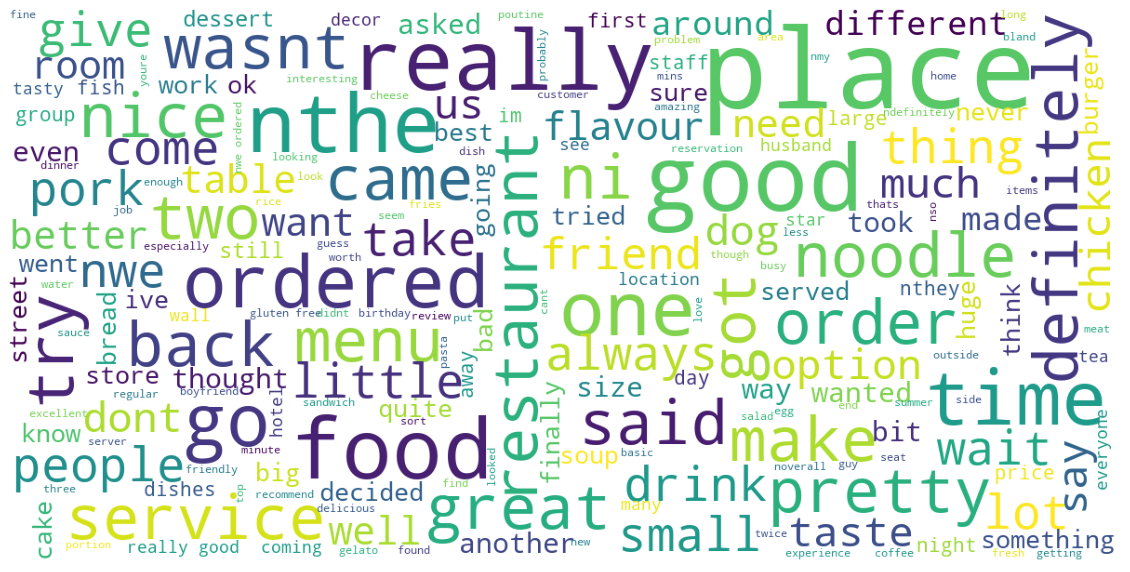

 SentimentModelTrain:After Tag  410.34 sec


/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:410: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


*************** checkmodel with DM
################# size  (1000000, 112)
****************  (700000, 106)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Train lr accuracy 0.6161228571428572
Testing accuracy 2 0.61515
RMSE on val  for sentiment logreg  1.0318139367153363
RMSE on train  for sentiment linear regression    0.9284949749735275
RMSE on  val  for sentiment linear regression   0.9275963152680673


/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:410: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


**************checkmodel with BOW
################# size  (1000000, 112)
****************  (700000, 106)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Train lr accuracy 0.6211485714285714
Testing accuracy 2 0.6214933333333333
RMSE on val  for sentiment logreg  0.9669884521888907
RMSE on train  for sentiment linear regression    0.8746360714958049
RMSE on  val  for sentiment linear regression   0.8734220431056754
*************** checkmodel with DM + BOW


/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:410: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


################# size  (500000, 212)
****************  (350000, 206)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Train lr accuracy 0.6291428571428571
Testing accuracy 2 0.6288466666666667
RMSE on val  for sentiment logreg  0.9776059192401267
RMSE on train  for sentiment linear regression    0.8624430861632923
RMSE on  val  for sentiment linear regression   0.857831946113842
 SentimentModelTrain:After Tag  1429.79 sec


In [0]:
SentimentModelTrain ()


The function below read the test file after the text preprocess run the embedding and run the 6 models  on the test and print the RMSE 


In [0]:
def SentimentModelPredict():
    train_start = time.time() 
    print(' Reading the df after pre processing ')
    
    trainsen= tc.SFrame.read_csv('reviewTsfull2.csv',verbose = False)
    print (" Readin the test data ",trainsen.shape)

    train_tagged = [TaggedDocument(words=tokenize_text(_d) , tags=[i]) for i, _d in enumerate(trainsen['reviews_train_clean'])] 
    
    train_end =  time.time()   
    print(' SentimentModelPredict:After Tag  {:.2f} sec'.format(train_end - train_start))  
    checkmodel (trainsen,train_tagged,1,0)
    checkmodel (trainsen,train_tagged,0,0)
    checkmodel (trainsen,train_tagged,2,0)
    train_end =  time.time() 
    print(' SentimentModelPredict:After Tag  {:.2f} sec'.format( train_end - train_start))




In [0]:
SentimentModelPredict()

 Reading the df after pre processing 
 Readin the test data  (694550, 12)
 SentimentModelPredict:After Tag  295.01 sec


/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:410: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


**************checkmodel with BOW
################# size  (694550, 112)
RMSE on test  for sentiment log reg   1.7017456852792783
RMSE on test  for sentiment linear reg   1.5406967744351896


/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:410: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


*************** checkmodel with DM
################# size  (694550, 112)
RMSE on test  for sentiment log reg   1.9493777029705701
RMSE on test  for sentiment linear reg   1.381240590926971
*************** checkmodel with DM + BOW


/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:410: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


################# size  (694550, 212)
RMSE on test  for sentiment log reg   1.9479347123695303
RMSE on test  for sentiment linear reg   1.543758308875339
 SentimentModelPredict:After Tag  489.98 sec


## ***********  Ensemble of  the Predictors (SVD, BOW , DM, DM+BOW)************

We built ensamble model that train on 500000 ( due to memory )
The model is a prediction on SVD , BOW,DM and DM+BOW
we built data frame with the prediction per  row.
then we train linear rgerssion model and check RMSE

In [0]:
lr = LinearRegression(fit_intercept=True)

def TrainEnsamble():
  trainsen= tc.SFrame.read_csv('reviewTrfull4.csv',nrows = 500000,verbose = False)
  print (trainsen.shape)
  X= trainsen[['user_id', 'business_id', 'stars']]
  data = np.load('SVD.npz')
  bu = data['bu']
  bi = data['bi']
  pu = data['pu']
  qi = data['qi']
  t = predictSVD(X)

  train_tagged = [TaggedDocument(words=tokenize_text(_d) , tags=[i]) for i, _d in enumerate(trainsen['reviews_train_clean'])] 
     
  predDM = checkmodel (trainsen,train_tagged,0,0)
  predbow = checkmodel (trainsen,train_tagged,1,0)
  pred_dm_bow = predbow = checkmodel (trainsen,train_tagged,2,0)
  
  trainsen = trainsen.add_column(np.around(predbow, decimals=3),column_name= 'BOW')
  trainsen = trainsen.add_column(np.around(predDM, decimals=3),column_name= 'DM')
  trainsen = trainsen.add_column(np.around(t, decimals=3),column_name= 'SVD')
  trainsen = trainsen.add_column(np.around(pred_dm_bow, decimals=3),column_name= 'DMPlusBOW')
  ensamble_cols = [ "BOW","DM","SVD","DMPlusBOW"]
  trainsen = trainsen.to_dataframe()
  trainsen = trainsen.sample(frac = 1)
  features = [c for c in trainsen.columns if c  in ensamble_cols]
  
  X_train, X_val, y_train, y_val = train_test_split(trainsen[features],  trainsen['stars'], test_size = 0.30, random_state = 42)
  print (X_train.head(5))
  lr.fit(X_train, y_train)
  y_pred =lr.predict(X_val)
  rmse = sqrt(mean_squared_error(y_val, np.array(y_pred) ))

  print ("RMSE for ensamble on validation ",rmse)
  return rmse

In [0]:
TrainEnsamble()


(500000, 12)
Start to run predict SVD
predictSVD took 2.09 sec
predictSVD RMSE 0.970 
predictSVD MSE 0.779 


/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:410: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


*************** checkmodel with DM
################# size  (500000, 112)
RMSE on test  for sentiment log reg   1.0301223228335556
RMSE on test  for sentiment linear reg   0.9282455810657494


/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:410: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


**************checkmodel with BOW
################# size  (500000, 112)
RMSE on test  for sentiment log reg   0.9659223571281493
RMSE on test  for sentiment linear reg   0.8733243478343256
*************** checkmodel with DM + BOW


/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:410: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


################# size  (500000, 212)
RMSE on test  for sentiment log reg   0.9815243247113135
RMSE on test  for sentiment linear reg   0.8610623369661708
          BOW     DM    SVD  DMPlusBOW
226114  3.664  3.646  3.185      3.664
435187  2.324  2.461  4.587      2.324
294452  4.325  4.883  4.233      4.325
427864  2.950  2.832  2.831      2.950
188822  5.020  4.931  3.986      5.020
RMSE for ensamble on validation  0.7060008113172817


0.7060008113172817

After we train the ensamble model we run it on the test 


In [0]:
def TestEnsamble():

  trainsen= tc.SFrame.read_csv('reviewTsfull2.csv',verbose = False)
  print (trainsen.shape)
  X= trainsen[['user_id', 'business_id', 'stars']]
  data = np.load('SVD.npz')
  bu = data['bu']
  bi = data['bi']
  pu = data['pu']
  qi = data['qi']
  t = predictSVD(X)

  trainsen.print_rows(10)

  train_tagged = [TaggedDocument(words=tokenize_text(_d) , tags=[i]) for i, _d in enumerate(trainsen['reviews_train_clean'])] 
     
  predDM = checkmodel (trainsen,train_tagged,0,0)
  predbow = checkmodel (trainsen,train_tagged,1,0)
  pred_dm_bow = predbow = checkmodel (trainsen,train_tagged,2,0)
  
  trainsen = trainsen.add_column(np.around(predbow, decimals=3),column_name= 'BOW')
  trainsen = trainsen.add_column(np.around(predDM, decimals=3),column_name= 'DM')
  trainsen = trainsen.add_column(np.around(t, decimals=3),column_name= 'SVD')
  trainsen = trainsen.add_column(np.around(pred_dm_bow, decimals=3),column_name= 'DMPlusBOW')
  ensamble_cols = [ "BOW","DM","SVD","DMPlusBOW"]
  trainsen = trainsen.to_dataframe()
  trainsen = trainsen.sample(frac = 1)
  features = [c for c in trainsen.columns if c  in ensamble_cols]
  y_test = trainsen['stars']
  X_test = trainsen[features]
 
  y_pred =lr.predict(X_test)
  rmse = sqrt(mean_squared_error(y_test, np.array(y_pred) ))

  print ("RMSE for ensamble on testing ",rmse)
  return rmse


In [0]:
TestEnsamble()

(694550, 12)
predictSVD took 3.07 sec
predictSVD rmse 1.271 sec


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:410: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


*************** checkmodel with DM
################# size  (694550, 112)
RMSE on test  for sentiment log reg   1.9493777029705701
RMSE on test  for sentiment linear reg   1.381240590926971


/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:410: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


**************checkmodel with BOW
################# size  (694550, 112)
RMSE on test  for sentiment log reg   1.7017456852792783
RMSE on test  for sentiment linear reg   1.5406967744351896
*************** checkmodel with DM + BOW


/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:410: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


################# size  (694550, 212)
RMSE on test  for sentiment log reg   1.9479347123695303
RMSE on test  for sentiment linear reg   1.543758308875339
RMSE for ensamble on testing  1.2956354907869683


1.2956354907869683

In [0]:


predlist =[]
def trainSVDPlus (X,X_val ,Latentfeatures ,max_epoc,reg5,reg6,lr):
    
    print (users,business,X.shape,X_val.shape)
    
    pu = np.random.uniform (-1,1 ,(users,Latentfeatures))/10000 
    #item factor matrix
    qi = np.random.uniform (-1,1 ,(business,Latentfeatures))/10000
    
    #item preference facotor
    bu = np.zeros(users,np.double)
    #item bias
    bi = np.zeros(business,np.double)   
    rmse = np.zeros(max_epoc)
    #item preference facotor
    
    y= np.random.uniform (-1,1 ,(business,Latentfeatures))/10000
    startsvdpp = time.time()  
    for epoch in range(max_epoc):
      startepoc = time.time()  
      print(" processing epoch {}".format(epoch),business , users )
      w = 0;
      for i,g in enumerate  (X):
   
        user, bus, rating = g['user_id'], g['business_id'], g['stars']
         
        t = user_rating_stats[user_rating_stats['user_id']==user]
        u_bus = t['bud_u_id']
        u_bus= u_bus.to_numpy()
        nu = len(u_bus) 
       # nu, sum_y = get_sum_y(user)
        sqrt_nu = np.sqrt(nu) 
        y_u = np.sum(y[u_bus[0][:]])
        train_end = time.time() 
        w= w+1;
        if (w > 100001 ):
          print(' after 100000  {:.2f} sec'.format(train_end - startepoc)) 
          print ("we are on record ",i)
          print (y[u_bus[0][:]])
          w=0
       
        u_impl_prf = y_u / sqrt_nu
        train_end = time.time() 
        
        pred_r = rat_avg + bu[user] + bi[bus] + np.dot(qi[bus],pu[user] + u_impl_prf)  
        err = rating - pred_r

        #sgd - we run in like in the handbook with two regulation paramthere
        bu[user] += lr * (err - reg5 * bu[user])
        bi[bus] += lr * (err - reg5 * bi[bus])
        train_end = time.time() 
        pu[user] += lr * (err * qi[bus] - reg6 * pu[user])
        qi[bus] += lr * (err * (pu[user] + u_impl_prf) - reg6 * qi[bus])
        
        for j in u_bus[0]:
          y[j] += lr * (err * qi[j] / sqrt_nu - reg6 * y[j])

       
      train_end =  time.time()
      print(' trainSVDPlus2  {:.2f} sec'.format(train_end - startepoc))   
     
      predlist =[]

      if ((epoch + 1) % 5) == 0 or epoch == 0:
        for i,g in enumerate  (X_val):
         
          user, bus, rating = g['user_id'], g['business_id'], g['stars']
        
          pred = rat_avg #check if this is the right value
          if user > -1:
            pred += bu[user]
          if bus > -1:
            pred += bi[bus]
          if (user > -1) and (bus > -1):
            t = user_rating_stats[user_rating_stats['user_id']==user]
            u_bus = t['bud_u_id']
            u_bus= u_bus.to_numpy()
            nu = len(u_bus)
            #u_items =  [ X[i,1] for i in range(len (X[:,0])) if X[i,0] == user] 
            #nu = len(u_items)
            sqrt_nu = np.sqrt(nu)
            y_u = np.sum(y[u_bus[0][:]]) / sqrt_nu
            pred = rat_avg + bu[user] + bi[bus] + np.dot(qi[bus], pu[user] + y_u)
            
            predlist.append(pred) 
          
        rmse[epoch] = sqrt(mean_squared_error(X_val['stars'], np.array(predlist) ))
        if (epoch> 0):
          lr -= 0.001
          if ((rmse[epoch]-rmse[epoch-1] ) > 0.000001):
            print ("No improvment stoping in epoc ",epoch)
            print(rmse)
            break;
        train_end =  time.time()   
        
        print('RMSE {:.3f} '.format(rmse[epoch]))

    endsvdpp = time.time()  
    print(' trainSVDPlus2  {:.2f} sec'.format(endsvdpp - startsvdpp))
    return   bu, bi, pu, qi,y         



def predictSVDPlus ( X):

  print(' predictSVDPlus ',X.shape )   
  startp = time.time() 
  predlist = []
  for i,g in enumerate  (X):
    
    user, bus, rating = g['user_id'], g['business_id'], g['stars']
    
    pred = rat_avg #check if this is the right value
    if user > -1:
      pred += bu[user]
    if bus > -1:
      pred += bi[bus]
    if (user > -1) and (bus > -1):
      t = user_rating_stats[user_rating_stats['user_id']==user]
      u_bus = t['bud_u_id']
      u_bus= u_bus.to_numpy()
      nu = len(u_bus)
     
      sqrt_nu = np.sqrt(nu)
      y_u = np.sum(y[u_bus[0][:]]) / sqrt_nu
      pred = rat_avg + bu[user] + bi[bus] + np.dot(qi[bus], pu[user] + y_u)
          
    predlist.append(pred) 

  rmse = sqrt(mean_squared_error(X['stars'], np.array(predlist) ))
  endp =  time.time()   
  print(' predictSVDPlus  {:.2f} sec'.format(endp - startp))    
  print('RMSE {:.3f} '.format(rmse))
  return rmse

In [0]:
bu, bi, pu, qi,y  = trainSVDPlus (X[0:100000],X_val, Latentfeatures =20,max_epoc=5,reg5= 0.02,reg6 = 0.02 ,lr=0.007)
np.savez('SVDpp.npz', bu=bu, bi=bi,pu = pu,qi=qi,y=y)
data = np.load('SVDpp.npz')
bu = data['bu']
bi = data['bi']
pu = data['pu']
qi = data['qi']
y=data['y']
print ("***************************")
predlist = predictSVDPlus(X_val[0:10])

#rmse = predictSVDPlus(sft)

1176855 174282 (100000, 4) (3330, 4)
 processing epoch 0 174282 1176855
 trainSVDPlus2  3598.44 sec
RMSE 1.374 
 processing epoch 1 174282 1176855
 trainSVDPlus2  3595.13 sec
 processing epoch 2 174282 1176855
 trainSVDPlus2  3570.41 sec
 processing epoch 3 174282 1176855
 trainSVDPlus2  3563.40 sec
 processing epoch 4 174282 1176855
 trainSVDPlus2  3552.25 sec
No improvment stoping in epoc  4
[1.37424087 0.         0.         0.         1.35884602]
 trainSVDPlus2  18115.94 sec
***************************
 predictSVDPlus  (10, 4)
 predictSVDPlus  0.37 sec
RMSE 1.101 


In [0]:
data = np.load('SVDpp.npz')
bu = data['bu']
bi = data['bi']
pu = data['pu']
qi = data['qi']
y=data['y']
print ("***************************")
predlist = predictSVDPlus(X_val)
print ("Check on part of test")
rmse = predictSVDPlus(sft[0:10000])

***************************
 predictSVDPlus  (3330, 4)
 predictSVDPlus  111.12 sec
RMSE 1.359 
Check on part of test
 predictSVDPlus  (10000, 4)
 predictSVDPlus  279.54 sec
RMSE 1.400 


## Step 7: Surprise library

1) We did short bench mark on the library using three models on 50k ROWS
2) We run the suprise svd with the same configuration like the SVD we implemented and we got the same results :)



In [0]:

from surprise import Reader
from surprise import Dataset
from surprise.model_selection import cross_validate

from surprise import SVD
from surprise import BaselineOnly
from surprise import SVDpp
from surprise.accuracy import rmse
from surprise import accuracy
from surprise.model_selection import train_test_split

def RunSuprise ():
  sf= tc.SFrame.read_csv('ID4Train.csv',verbose = False,nrows = 500000)
  sf = sf.dropna()
  reader = Reader(rating_scale=(1, 5))
  df = t.to_dataframe()
  data = Dataset.load_from_df(df[['user_id', 'business_id', 'stars']], reader)
  benchmark = []
  # Iterate over all algorithms
  for algorithm in [SVD(), SVDpp(),BaselineOnly()]:
      # Perform cross validation
      results = cross_validate(SVD(), data, measures=['RMSE'], cv=3, verbose=False)
      
      # Get results & append algorithm name
      tmp = pd.DataFrame.from_dict(results).mean(axis=0)
      tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))
      benchmark.append(tmp)

  print (pd.DataFrame(benchmark).set_index('Algorithm').sort_values('test_rmse') )    

In [0]:
RunSuprise()

              test_rmse   fit_time  test_time
Algorithm                                    
BaselineOnly   1.340766  27.722773   1.956520
SVD            1.340920  28.618538   1.974206
SVDpp          1.341270  27.770007   1.928597


Run suprise SVD with the same paramther we run our implemenation 

In [0]:
def RunSupriseSVDSame ():
  sft= tc.SFrame.read_csv('ID2test.csv',verbose = False)
  sft = sft.dropna()
  t = tc.SFrame.read_csv('ID4Train.csv',verbose = False)
  t= t.dropna()
  reader = Reader(rating_scale=(1, 5))
  df = t.to_dataframe()
  data = Dataset.load_from_df(df[['user_id', 'business_id', 'stars']], reader)
  trainset = data.build_full_trainset()
  algo = SVD(n_factors = 100,n_epochs =20,reg_all = 0.02,lr_all =0.005)
  svd_fit = algo.fit(trainset)
  dft = sft.to_dataframe()
  data_t = Dataset.load_from_df(dft[['user_id', 'business_id', 'stars']], reader)
  testset = data_t.build_full_trainset()
  testset = testset.build_testset()
  predictions = algo.test(testset)
  print ("RunSupriseSVDSame" , accuracy.rmse(predictions))
  

In [0]:
RunSupriseSVDSame()

RMSE: 1.2704
RunSupriseSVDSame 1.2703678865987422
